In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Correlation, regression

We will use acoustic features to distinguish a male voice from female. Load the dataset from “voice.csv”, identify the target variable and do a one-hot encoding for the same. Split the dataset in train-test with 20% of the data kept aside for testing. [Hint: Refer to LabelEncoder documentation in scikit-learn]

In [10]:
df_voice = pd.read_csv('voice.csv', encoding = 'utf-8')
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

The target variable is the 'label' column. 

In [9]:
le.fit(df_voice['label'])
le.classes_

array(['female', 'male'], dtype=object)

In [19]:
from sklearn.model_selection import train_test_split
features = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
target = ['label']
X = df_voice[features]
Y = df_voice[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)

2. Fit a logistic regression model and measure the accuracy on the test set.
[Hint: Refer to Linear Models section in scikit-learn]

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.predict(X_test)
clf.predict_proba(X_test) 
clf.score(X_test, y_test)

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9148264984227129

3. Compute the correlation matrix that describes the dependence between all predictors and identify the predictors that are highly correlated. Plot the correlation matrix using seaborn heatmap.
[Hint: Explore dataframe methods to identify appropriate method]

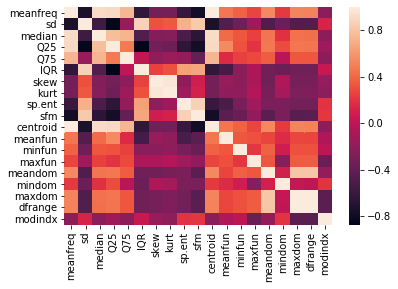

In [25]:
import seaborn as sns

corr = X.corr()
sns.heatmap(corr)

In [26]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1,-0.74,0.93,0.91,0.74,-0.63,-0.32,-0.32,-0.6,-0.78,1,0.46,0.38,0.27,0.54,0.23,0.52,0.52,-0.22
sd,-0.74,1,-0.56,-0.85,-0.16,0.87,0.31,0.35,0.72,0.84,-0.74,-0.47,-0.35,-0.13,-0.48,-0.36,-0.48,-0.48,0.12
median,0.93,-0.56,1,0.77,0.73,-0.48,-0.26,-0.24,-0.5,-0.66,0.93,0.41,0.34,0.25,0.46,0.19,0.44,0.44,-0.21
Q25,0.91,-0.85,0.77,1,0.48,-0.87,-0.32,-0.35,-0.65,-0.77,0.91,0.55,0.32,0.2,0.47,0.3,0.46,0.45,-0.14
Q75,0.74,-0.16,0.73,0.48,1,0.0096,-0.21,-0.15,-0.17,-0.38,0.74,0.16,0.26,0.29,0.36,-0.024,0.34,0.34,-0.22
IQR,-0.63,0.87,-0.48,-0.87,0.0096,1,0.25,0.32,0.64,0.66,-0.63,-0.53,-0.22,-0.07,-0.33,-0.36,-0.34,-0.33,0.041
skew,-0.32,0.31,-0.26,-0.32,-0.21,0.25,1,0.98,-0.2,0.08,-0.32,-0.17,-0.22,-0.081,-0.34,-0.062,-0.31,-0.3,-0.17
kurt,-0.32,0.35,-0.24,-0.35,-0.15,0.32,0.98,1,-0.13,0.11,-0.32,-0.19,-0.2,-0.046,-0.3,-0.1,-0.27,-0.27,-0.21
sp.ent,-0.6,0.72,-0.5,-0.65,-0.17,0.64,-0.2,-0.13,1,0.87,-0.6,-0.51,-0.31,-0.12,-0.29,-0.29,-0.32,-0.32,0.2
sfm,-0.78,0.84,-0.66,-0.77,-0.38,0.66,0.08,0.11,0.87,1,-0.78,-0.42,-0.36,-0.19,-0.43,-0.29,-0.44,-0.43,0.21


'Q25', 'median', 'centroid' and 'meanfreq', 'maxdom' and 'dfrange', 'skew' and 'kurt' are highly correlated. 

4. Based on correlation remove those predictors that are correlated and fit a logistic regression model again and compare the accuracy with that of previous model.
[Hint: Identify correlated variable pairs and remove one among them]

In [28]:
df1 = df_voice[['sd', 'Q75', 'IQR', 'sp.ent', 'sfm', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'modindx', 'label']]
df1.head()

,sd,Q75,IQR,sp.ent,sfm,meanfun,minfun,maxfun,meandom,mindom,modindx,label
0,0.064241,0.090193,0.075122,0.893369,0.491918,0.084279,0.015702,0.275862,0.007812,0.007812,0.000000,male
1,0.067310,0.092666,0.073252,0.892193,0.513724,0.107937,0.015826,0.250000,0.009014,0.007812,0.052632,male
2,0.083829,0.131908,0.123207,0.846389,0.478905,0.098706,0.015656,0.271186,0.007990,0.007812,0.046512,male
3,0.072111,0.207955,0.111374,0.963322,0.727232,0.088965,0.017798,0.250000,0.201497,0.007812,0.247119,male
4,0.079146,0.206045,0.127325,0.971955,0.783568,0.106398,0.016931,0.266667,0.712812,0.007812,0.208274,male


In [29]:
features = ['sd', 'Q75', 'IQR', 'sp.ent', 'sfm', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'modindx']
target = ['label']
X = df_voice[features]
Y = df_voice[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)

In [30]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.predict(X_test)
clf.predict_proba(X_test) 
clf.score(X_test, y_test)

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9369085173501577

## Part 2:

1. Let’s attempt to predict the survival of a horse based on various observed medical conditions. Load the data from ‘horses.csv’ and observe whether it contains missing values.
[Hint: Pandas dataframe has a method isnull]

In [76]:
df_horse = pd.read_csv('horse.csv', encoding = 'utf-8')
df_horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [77]:
df_horse.isnull().head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,...,False,False,True,True,False,False,False,False,False,False


2. This dataset contains many categorical features, replace them with label encoding. 
[Hint: Refer to get_dummies methods in pandas dataframe or Label encoder in scikit-learn]

In [35]:
df_horse.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [66]:
obj_df = df_horse.select_dtypes(include=['object']).copy()
obj_df.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,decreased,distend_large,NaN,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,absent,other,cloudy,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,normal,normal,NaN,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,NaN,serosanguious,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,no,no


In [67]:
obj_df['cp_data'].value_counts()

no     200
yes     99
Name: cp_data, dtype: int64

In [60]:
d = {'surgery': {'yes': 1, 'no': 0}, 
     'age': {'adult': 0, 'young': 1}, 
     'temp_of_extremities': {'cool': 0, 'normal': 1, 'warm': 2, 'cold': 3}, 
     'peripheral_pulse': {'normal': 0, 'reduced': 1, 'absent': 2, 'increased': 3}, 
     'mucous_membrane': {'normal_pink': 0, 'pale_pink': 1, 'pale_cyanotic': 2, 'bright_pink': 3, 'bright_red': 4, 'dark_cyanotic': 5}, 
     'capillary_refill_time': {'less_3_sec': 0, 'more_3_sec': 1, '3': 2}, 
     'pain': {'mild_pain':0, 'depressed': 1, 'extreme_pain': 2, 'severe_pain': 3, 'alert': 4}, 
     'peristalsis': {'hypomotile': 0, 'absent': 1, 'hypermotile': 2, 'normal': 3}, 
     'abdominal_distention': {'none': 0, 'moderate': 1, 'slight': 2, 'severe': 3}, 
     'nasogastric_tube': {'slight': 0, 'none': 1, 'significant': 2}, 
     'nasogastric_reflux': {'none': 0, 'more_1_liter': 1, 'less_1_liter': 2}, 
     'rectal_exam_feces': {'absent': 0, 'normal': 1, 'decreased': 2, 'increased': 3}, 
     'abdomen': {'distend_large': 0, 'distend_small': 1, 'normal': 2, 'other': 3, 'firm': 4}, 
     'abdomo_appearance': {'cloudy': 0, 'serosanguious': 1, 'clear': 2}, 
     'outcome': {'lived': 0, 'died': 1, 'euthanized': 2}, 
     'surgical_lesion': {'yes': 1, 'no': 0}, 
     'cp_data': {'yes': 1, 'no': 0}
    }

In [78]:
df_horse.replace(d, inplace=True)
df_horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,0.0,1.0,NaN,1.0,...,45.0,8.4,NaN,NaN,1,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,NaN,NaN,2.0,0.0,...,50.0,85.0,0.0,2.0,2,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,1.0,0.0,1.0,0.0,...,33.0,6.7,NaN,NaN,0,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,3.0,0.0,5.0,1.0,...,48.0,7.2,1.0,5.3,1,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,NaN,NaN,5.0,1.0,...,74.0,7.4,NaN,NaN,1,0,4300,0,0,0


3. Replace the missing values by the most frequent value in each column.
[Hint: Refer to Imputer class in Scikit learn preprocessing module]

In [79]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="most_frequent")
df_horse = imp.fit_transform(df_horse)
df_horse = pd.DataFrame(df_horse)
df_horse

# df_horse.fillna(0)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,0.0,1.0,0.0,1.0,...,45.0,8.4,0.0,0.0,1,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,0.0,0.0,2.0,0.0,...,50.0,85.0,0.0,2.0,2,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,1.0,0.0,1.0,0.0,...,33.0,6.7,0.0,0.0,0,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,3.0,0.0,5.0,1.0,...,48.0,7.2,1.0,5.3,1,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,0.0,0.0,5.0,1.0,...,74.0,7.4,0.0,0.0,1,0,4300,0,0,0
5,0,0,528355,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
6,1,0,526802,37.9,48.0,16.0,1.0,0.0,0.0,0.0,...,37.0,7.0,0.0,0.0,0,1,3124,0,0,0
7,1,0,529607,0.0,60.0,0.0,0.0,0.0,0.0,0.0,...,44.0,8.3,0.0,0.0,1,1,2208,0,0,0
8,0,0,530051,0.0,80.0,36.0,0.0,2.0,1.0,0.0,...,38.0,6.2,0.0,0.0,2,1,3205,0,0,0
9,0,1,5299629,38.3,90.0,0.0,1.0,0.0,0.0,0.0,...,40.0,6.2,2.0,2.2,0,0,0,0,0,1


4. Fit a decision tree classifier and observe the accuracy.

In [82]:
df_horse.astype('float32')
df_horse = df_horse.fillna(0)

[Text(228.28722998729353, 209.07692307692307, 'X[18] <= 51.5\nentropy = 0.573\nsamples = 239\nvalue = [137, 65, 37]'),
 Text(152.40419313850063, 192.35076923076923, 'X[4] <= 82.0\nentropy = 0.472\nsamples = 181\nvalue = [125, 35, 21]'),
 Text(107.84218551461245, 175.62461538461537, 'X[3] <= 37.15\nentropy = 0.385\nsamples = 141\nvalue = [108, 20, 13]'),
 Text(64.66277001270649, 158.89846153846153, 'X[19] <= 66.0\nentropy = 0.628\nsamples = 33\nvalue = [15, 12, 6]'),
 Text(57.85616264294791, 142.1723076923077, 'X[4] <= 54.0\nentropy = 0.642\nsamples = 27\nvalue = [9, 12, 6]'),
 Text(34.03303684879289, 125.44615384615385, 'X[2] <= 530016.5\nentropy = 0.539\nsamples = 16\nvalue = [9, 6, 1]'),
 Text(20.41982210927573, 108.72, 'X[18] <= 46.5\nentropy = 0.34\nsamples = 10\nvalue = [8, 1, 1]'),
 Text(13.613214739517154, 91.99384615384615, 'X[7] <= 1.5\nentropy = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(6.806607369758577, 75.2676923076923, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0, 0]')

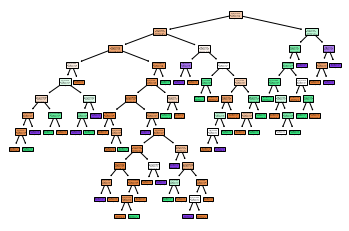

In [98]:
from sklearn import tree

features = ['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein', 'abdomo_appearance', 'abdomo_protein']
target = ['outcome']
X = df_horse[features]
Y = df_horse[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

tree.plot_tree(clf, filled=True) 

In [100]:
tree.DecisionTreeClassifier.score(clf, X_test, y_test)

0.7333333333333333

5. Fit a random forest classifier and observe the accuracy.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [95]:
print(clf.feature_importances_)

[0.01039994 0.00118632 0.06770173 0.06136758 0.08130456 0.02123003
 0.03711744 0.03887139 0.07280669 0.11696062 0.04893666 0.02411616
 0.02409054 0.00512105 0.00956193 0.01784215 0.01467752 0.02029732
 0.21636584 0.07586242 0.00987074 0.02431134]


In [96]:
clf.predict(X_test)
RandomForestClassifier.score(clf, X_test, y_test)

0.7

## Part 3: Project Banking domain

In [102]:
df = pd.read_csv('loan_borowwer_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [104]:
df[df.isnull().any(axis=1)]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [105]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [108]:
d = {'purpose': {'debt_consolidation': 0, 'all_other': 1, 'credit_card': 2, 'home_improvement': 3, 'small_business': 4, 'major_purchase': 5, 'educational': 6}}

In [109]:
df.replace(d, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [110]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1,-0.01,-0.29,0.059,0.035,-0.091,0.35,0.099,-0.19,-0.1,-0.54,-0.076,-0.054,-0.16
purpose,-0.01,1,-0.038,-0.068,0.015,-0.15,0.12,0.014,8.1e-05,-0.19,0.05,-0.0064,-0.019,0.032
int.rate,-0.29,-0.038,1,0.28,0.056,0.22,-0.71,-0.12,0.093,0.46,0.2,0.16,0.098,0.16
installment,0.059,-0.068,0.28,1,0.45,0.05,0.086,0.18,0.23,0.081,-0.01,-0.0044,-0.033,0.05
log.annual.inc,0.035,0.015,0.056,0.45,1,-0.054,0.11,0.34,0.37,0.055,0.029,0.029,0.017,-0.033
dti,-0.091,-0.15,0.22,0.05,-0.054,1,-0.24,0.06,0.19,0.34,0.029,-0.022,0.0062,0.037
fico,0.35,0.12,-0.71,0.086,0.11,-0.24,1,0.26,-0.016,-0.54,-0.19,-0.22,-0.15,-0.15
days.with.cr.line,0.099,0.014,-0.12,0.18,0.34,0.06,0.26,1,0.23,-0.024,-0.042,0.081,0.072,-0.029
revol.bal,-0.19,8.1e-05,0.093,0.23,0.37,0.19,-0.016,0.23,1,0.2,0.022,-0.033,-0.031,0.054
revol.util,-0.1,-0.19,0.46,0.081,0.055,0.34,-0.54,-0.024,0.2,1,-0.014,-0.043,0.067,0.082


In [111]:
features = ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
target = ['not.fully.paid']
X = df[features]
Y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=85)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train, y_train)

c:\users\administrator\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [112]:
print(clf.feature_importances_)

[0.19149079 0.01935388 0.22186026 0.04310543 0.04579803 0.01093127
 0.16450091 0.01439323 0.01377925 0.05143836 0.1901796  0.
 0.033169  ]


In [113]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
RandomForestClassifier.score(clf, X_test, y_test)

0.8434237995824635

## Part 4(Extra optional)

Implement Linear Regression or Logistic Regression (your choice) models. Estimators required
- Model.predict
- Model.fit
- Model.score
- Model.coef_
- Model.intercept_

#### Logistic Regression

In [142]:
import sklearn

iris = sklearn.datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [179]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.intercept(X)

        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold
    
    def score(self, X, y, probab_threshold=0.5):
        predicted_classes = (self.predict_prob(X) >= probab_threshold).astype(int)
        predicted_classes = predicted_classes.flatten()
        score = np.mean(predicted_classes == y)
        return score

In [180]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [181]:
model.theta = [-25.96818124,  12.56179068, -13.44549335]

In [182]:
model.fit(X, y)
# preds = model.predict(X, 300000)
# (preds == y).mean()
model.score(X, y.flatten())

1.0